1.Handling nan values or missing values
2.Handling Outliers
3.Handling categorical features
4.Handling duplicates
5.Handling imbalnce data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset= pd.read_csv("F:/iNeuron/House Price data/train.csv")

In [3]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# Print shape of dataset with arows and column
dataset.shape

(1460, 81)

## In data analysis we will analyze to find below stuff
1.Missing values
2.All the numerical variables
3.Distribution of numrical variable
4.categorical varibales
5.outliers
6.relationship betwn independant and dependant features

In [10]:
#Missing values

dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [5]:
features_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>=1]

In [6]:
features_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [17]:
#percentage of nan values-
dataset['Electrical'].isnull().mean()

0.0006849315068493151

In [7]:
#applying for loop for all the features in nan & 4 means 4 decimal for rounding off
for features in features_nan:
    print(features,np.round(dataset[features].isnull().mean()*100,4),'-->% missing value')

LotFrontage 17.7397 -->% missing value
Alley 93.7671 -->% missing value
MasVnrType 0.5479 -->% missing value
MasVnrArea 0.5479 -->% missing value
BsmtQual 2.5342 -->% missing value
BsmtCond 2.5342 -->% missing value
BsmtExposure 2.6027 -->% missing value
BsmtFinType1 2.5342 -->% missing value
BsmtFinType2 2.6027 -->% missing value
Electrical 0.0685 -->% missing value
FireplaceQu 47.2603 -->% missing value
GarageType 5.5479 -->% missing value
GarageYrBlt 5.5479 -->% missing value
GarageFinish 5.5479 -->% missing value
GarageQual 5.5479 -->% missing value
GarageCond 5.5479 -->% missing value
PoolQC 99.5205 -->% missing value
Fence 80.7534 -->% missing value
MiscFeature 96.3014 -->% missing value


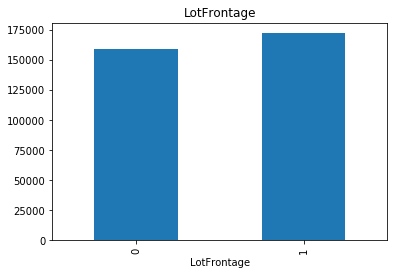

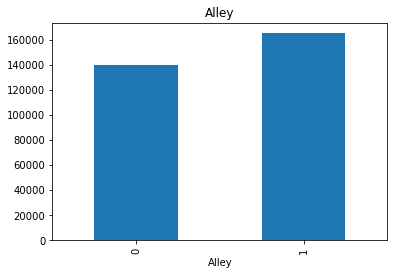

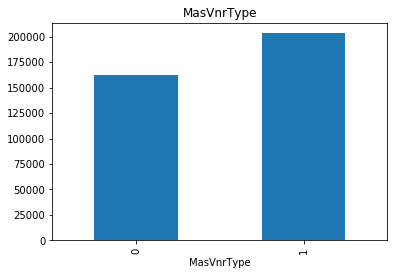

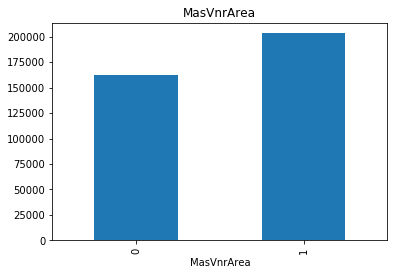

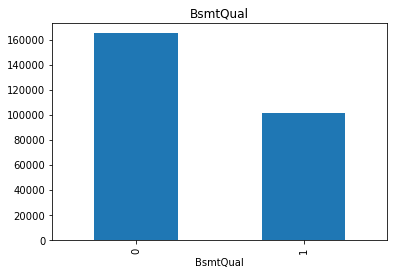

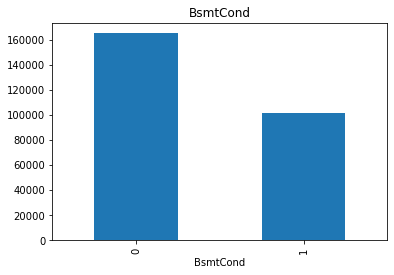

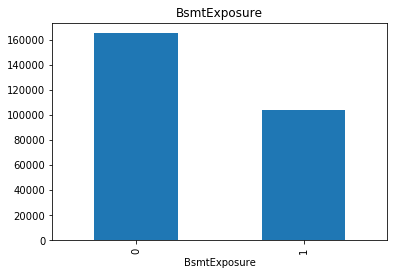

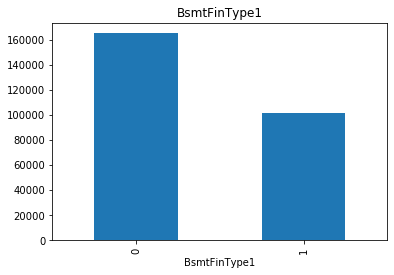

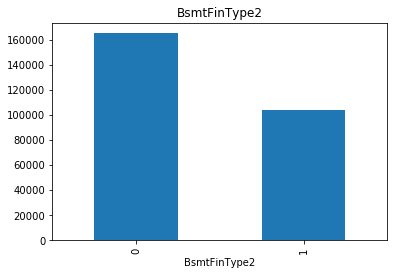

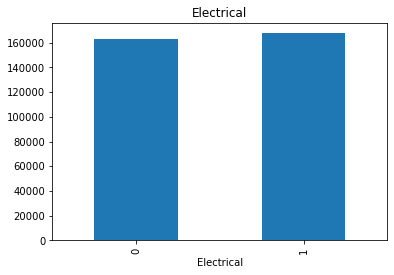

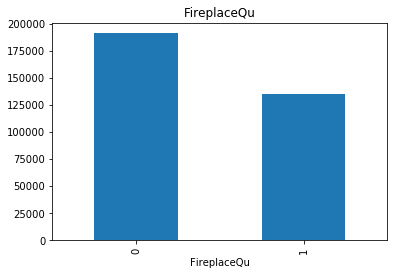

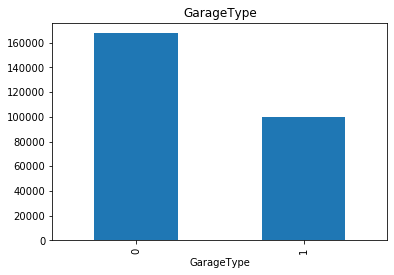

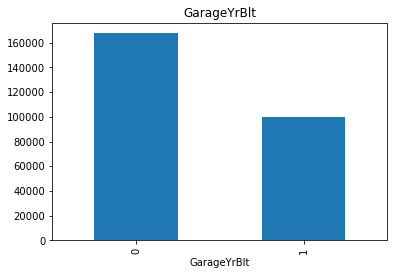

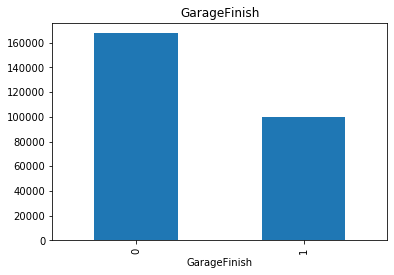

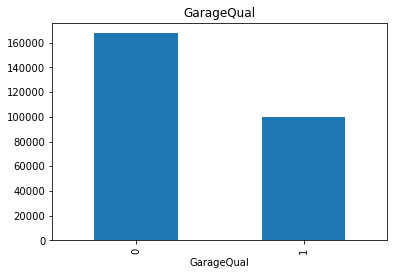

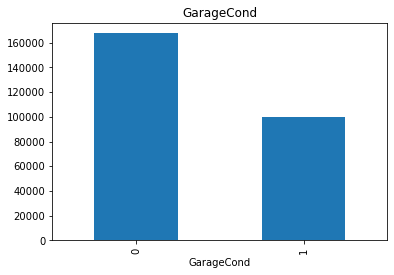

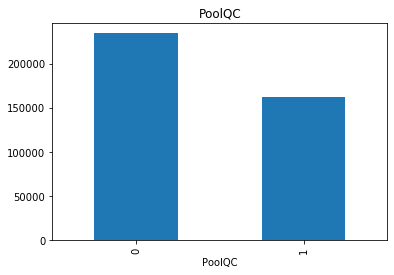

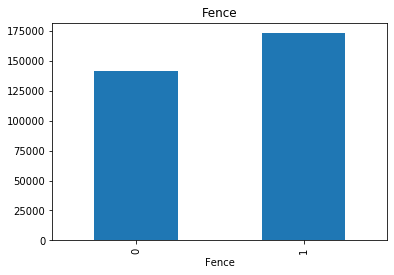

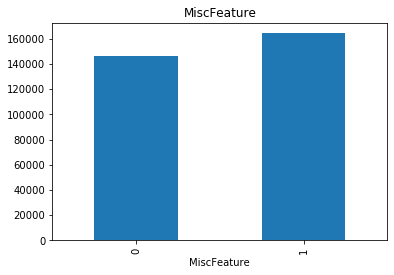

In [8]:
#ploting diagrams
# takeinh each n evry feature having nan value if it has nan value - 1 if not -0 amd then group by with 1 and 0 and then try to see how ploting hppen
data=dataset.copy()
for features in features_nan:
    
    #let make variable that indicate 1 if value is nan or 0
    data[features]=np.where(data[features].isnull(),1,0)
    #calculate mean sales prize where information is 1 or 0
    data.groupby(features)['SalePrice'].median().plot.bar()
    plt.title(features)
    plt.show()

Here with the relation betwwen the missing values and dependant variables is clearly visible so we need to replace these nan values with something meaningful which we will do in feature engineering section.

## Numerical varibales

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
#List of numerical varibles
dataset['SalePrice'].dtypes!='object'

True

In [17]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']

In [21]:
len(numerical_features)
dataset[numerical_features].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [24]:
#Temporal Variables(eg: datetime variables)
year_feature = [ feature for feature in numerical_features if 'Yr' in feature or "Year" in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [27]:
#finding unique year
for feature in year_feature:
    print(feature,dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0.5, 1.0, 'house price vs year sold')

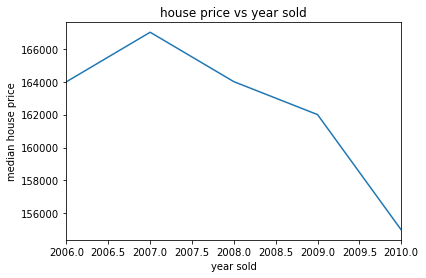

In [30]:
dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel("year sold")
plt.ylabel("median house price")
plt.title("house price vs year sold")

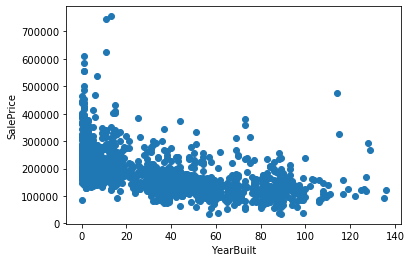

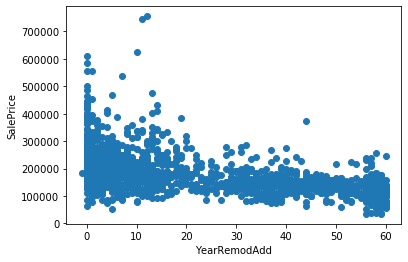

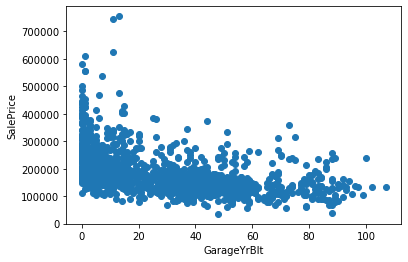

In [33]:
# we will compare diffrence between all year feature with saleprice
data=dataset.copy()
for feature in year_feature:
    if feature!="YrSold":
        data[feature]=data["YrSold"]-data[feature]
#        data[feature]---> age of the house
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.show()
        

Within all the yearwise information, it is clearly visible that the new houses are more costlier than the older one.Looks like a pareto or power law distribution.

In [37]:
#Numrical varibles - 2 types
#1. continuous varible 2. Discrete varible

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<=25]

In [38]:
len(discrete_feature)

18

In [40]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2,2008
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5,2007
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9,2008
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2,2006
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12,2008


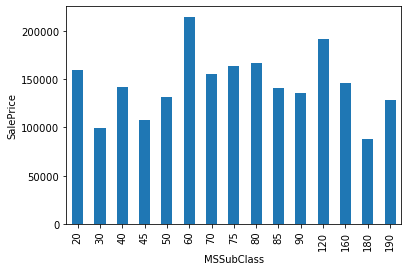

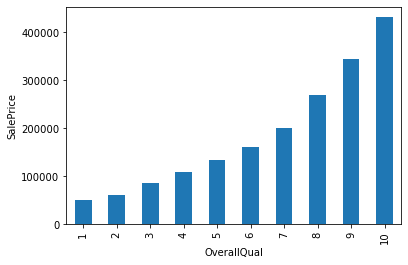

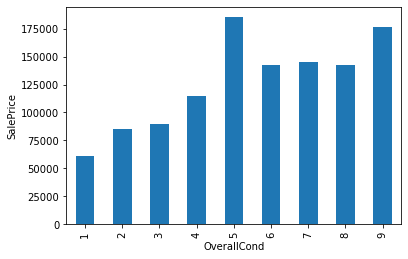

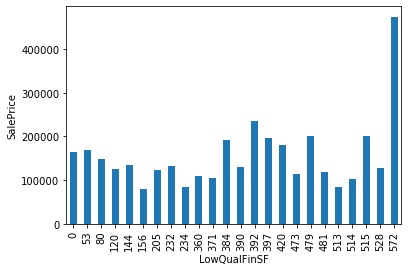

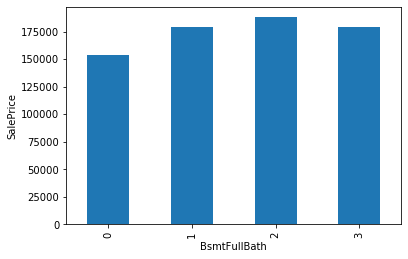

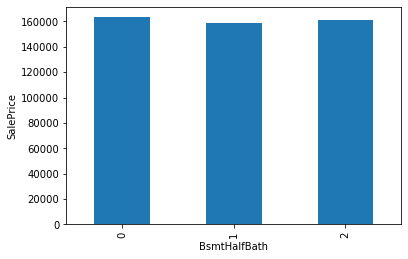

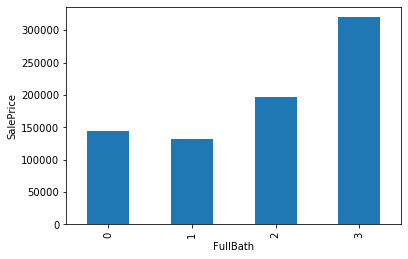

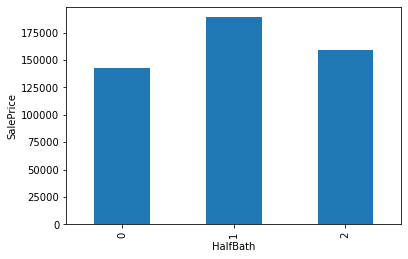

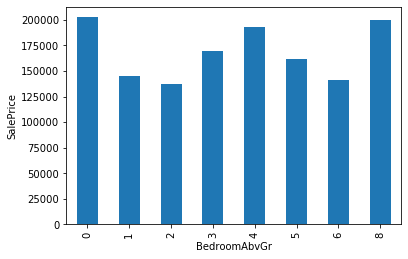

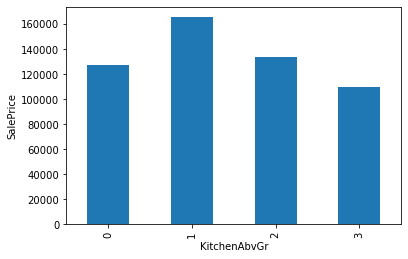

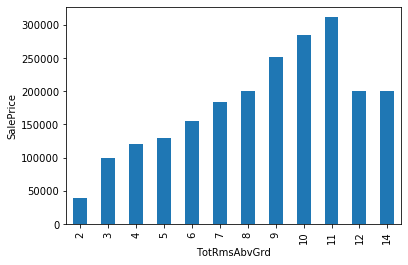

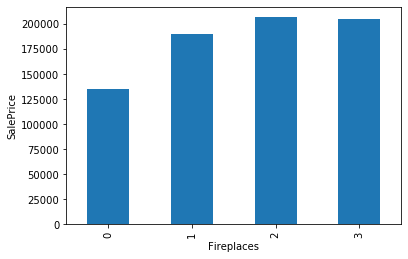

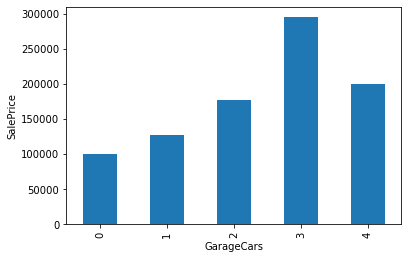

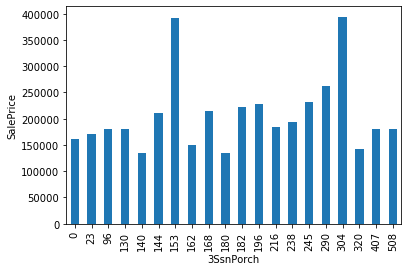

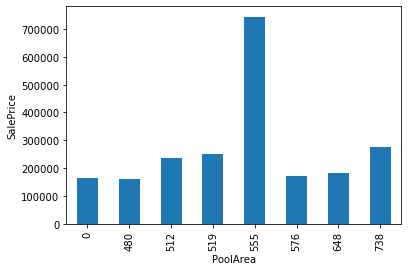

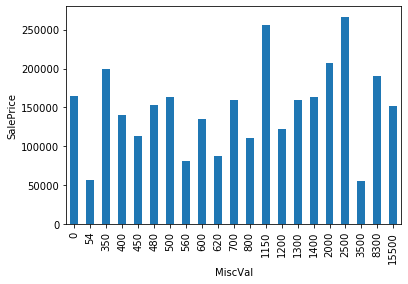

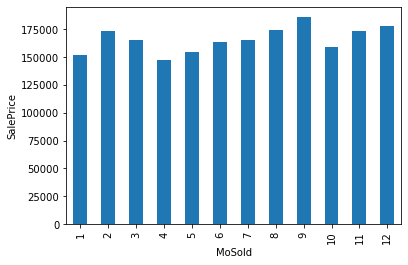

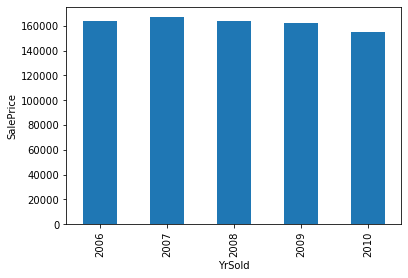

In [48]:
#find relation between discrete and saleprice
data=dataset.copy()
for feature in discrete_feature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.show()


There is a relationship between Discrete feature n saleprice

In [51]:
#Continuous variable
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]

In [52]:
len(continuous_feature)

17

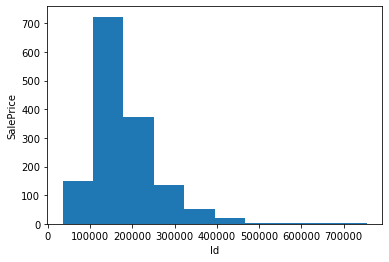

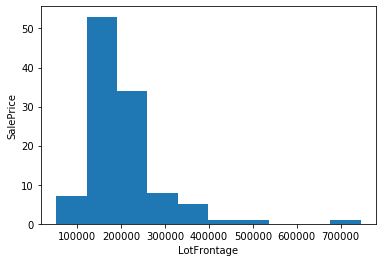

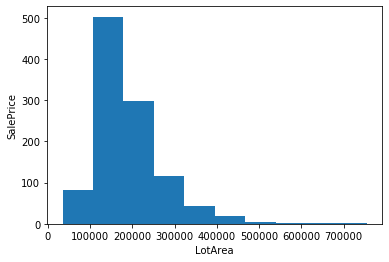

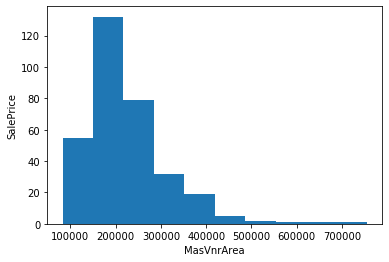

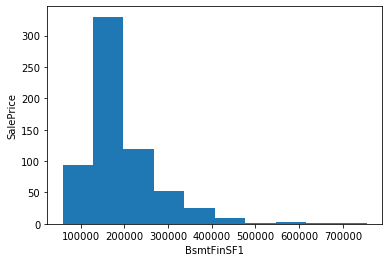

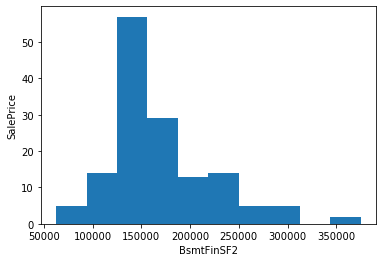

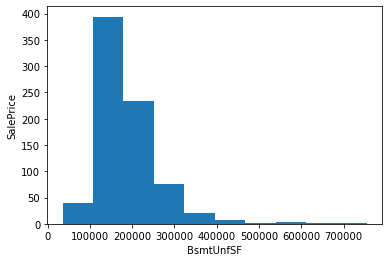

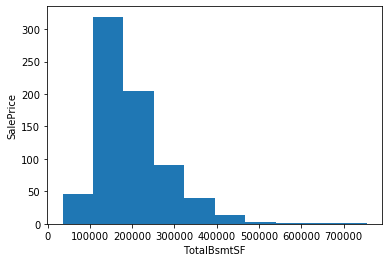

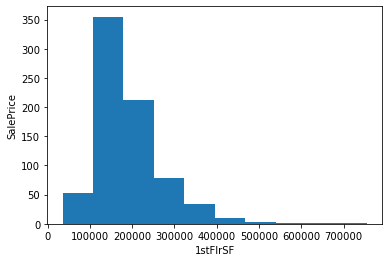

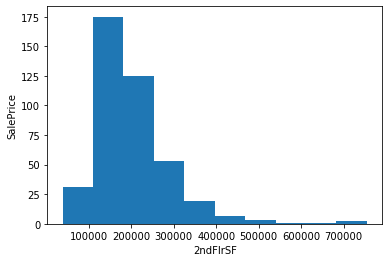

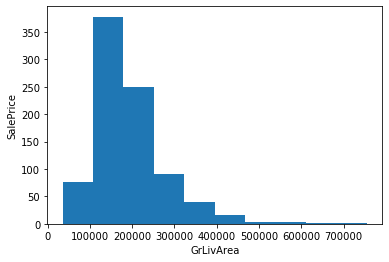

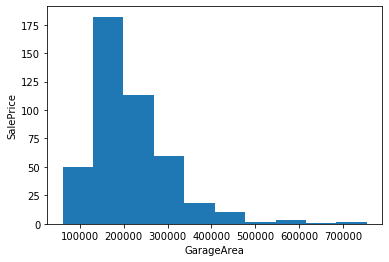

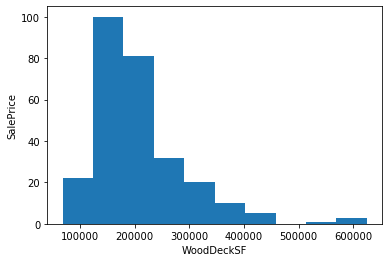

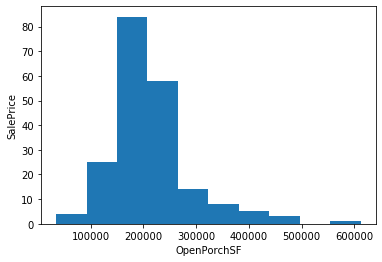

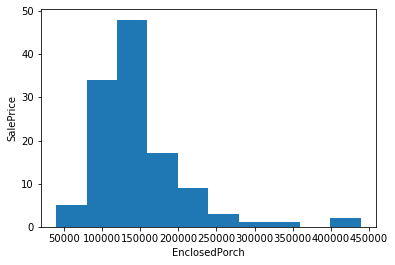

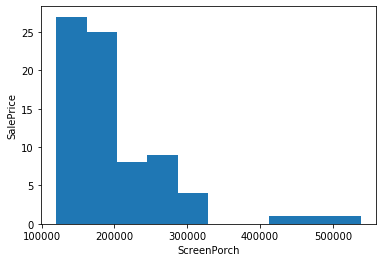

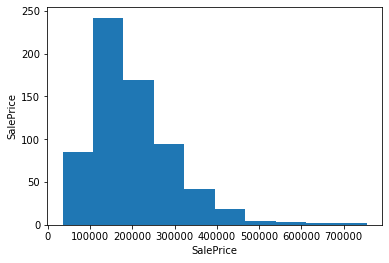

In [58]:
# let analyze continuous value by creating histogram to understand distribution
data = dataset.copy()
for feature in continuous_feature:
    
    
    plt.xlabel(feature)   
    plt.ylabel('SalePrice')
    plt.show()

## EDA PART 2

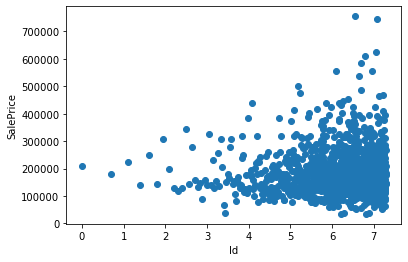

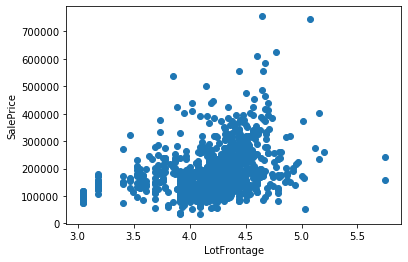

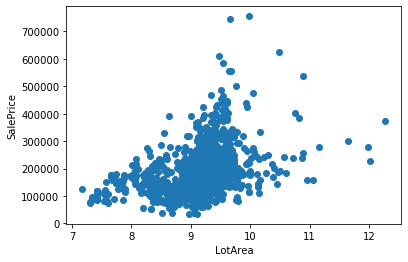

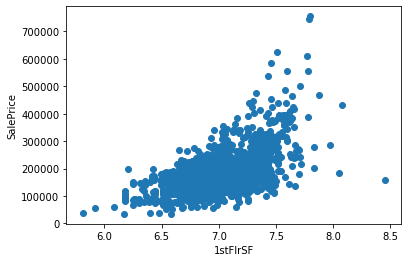

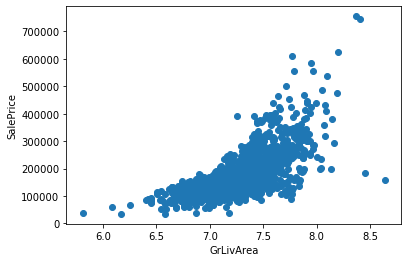

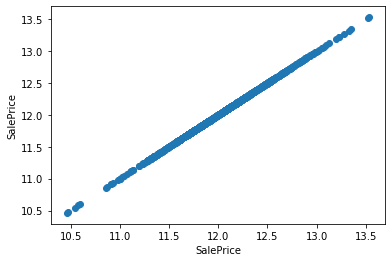

In [61]:
# we will be using Logrithmic transformation to convert log normal into normal distribution
data= dataset.copy()
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

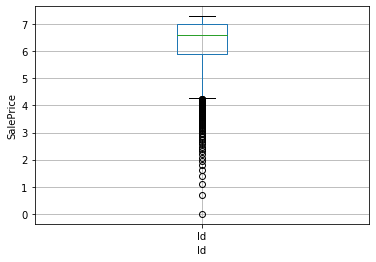

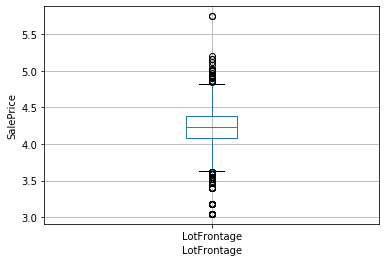

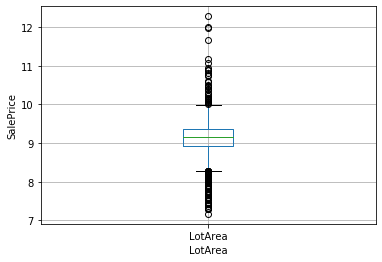

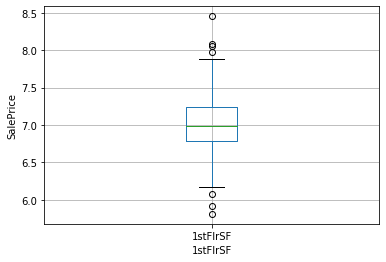

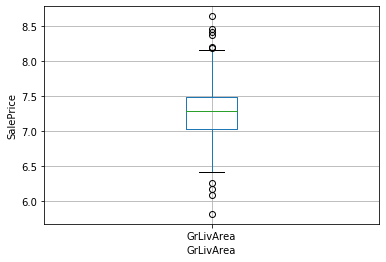

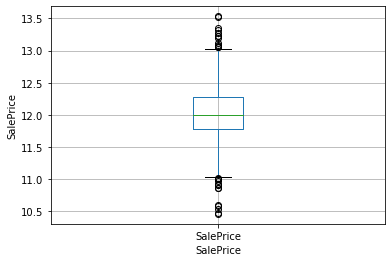

In [62]:
#Outliers 
data= dataset.copy()
for feature in continuous_feature:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()
        

# Categorical Variable

In [68]:
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
len(categorical_feature)

43

In [69]:
dataset[categorical_feature].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [73]:
for feature in categorical_feature:
    print("the feature name is {} and the number of categorical are {}".format(feature,len(dataset[feature].unique())))

the feature name is MSZoning and the number of categorical are 5
the feature name is Street and the number of categorical are 2
the feature name is Alley and the number of categorical are 3
the feature name is LotShape and the number of categorical are 4
the feature name is LandContour and the number of categorical are 4
the feature name is Utilities and the number of categorical are 2
the feature name is LotConfig and the number of categorical are 5
the feature name is LandSlope and the number of categorical are 3
the feature name is Neighborhood and the number of categorical are 25
the feature name is Condition1 and the number of categorical are 9
the feature name is Condition2 and the number of categorical are 8
the feature name is BldgType and the number of categorical are 5
the feature name is HouseStyle and the number of categorical are 8
the feature name is RoofStyle and the number of categorical are 6
the feature name is RoofMatl and the number of categorical are 8
the feature 

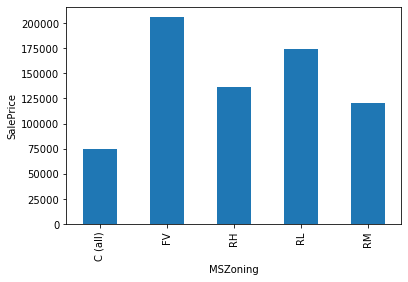

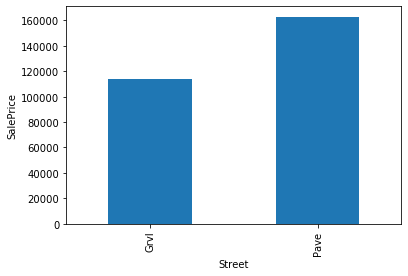

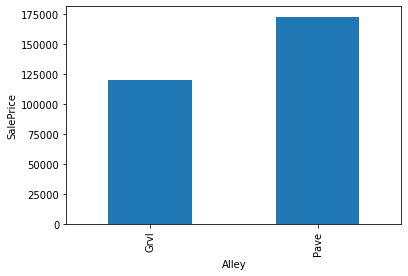

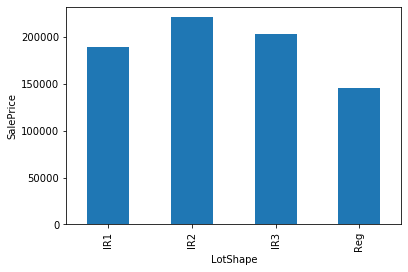

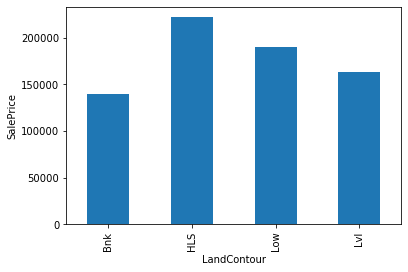

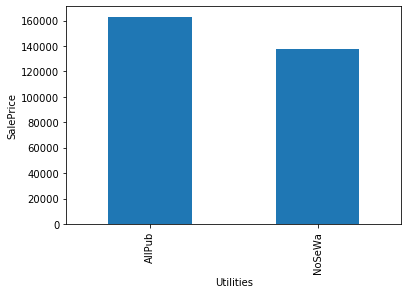

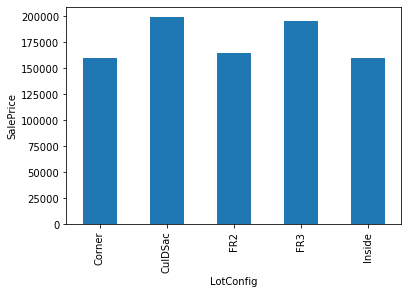

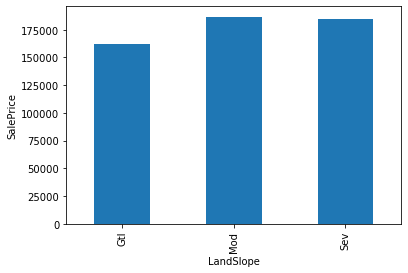

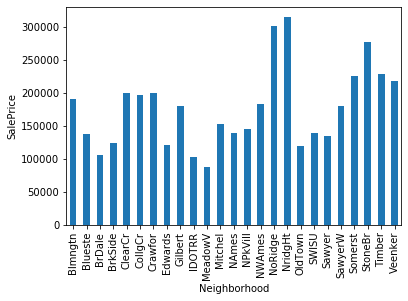

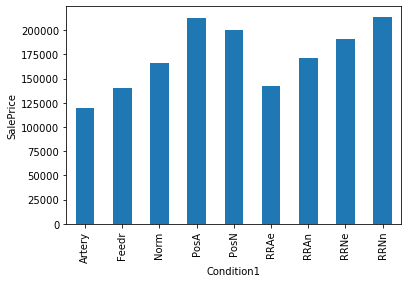

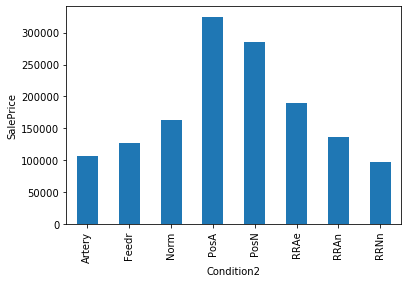

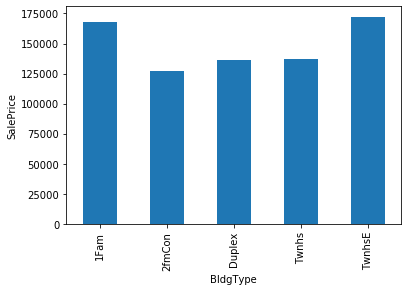

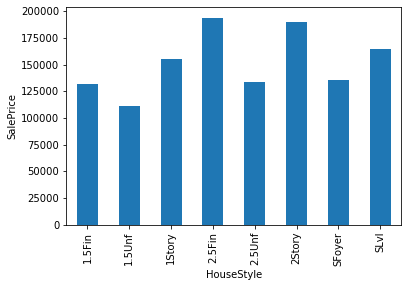

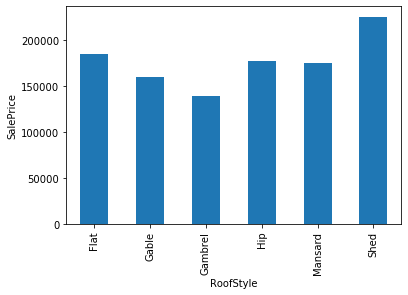

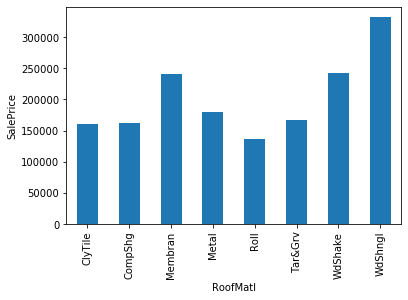

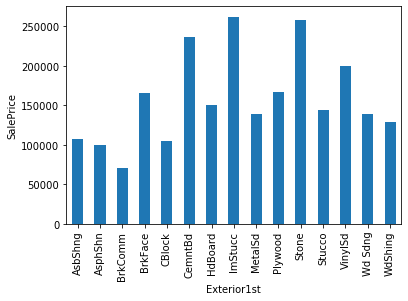

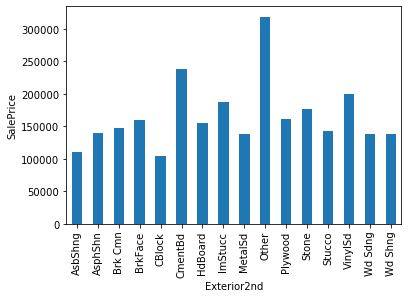

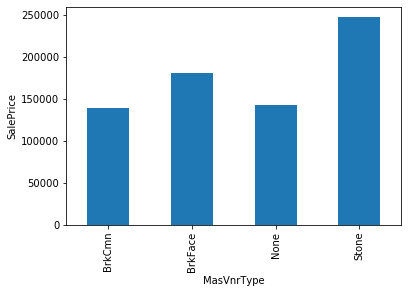

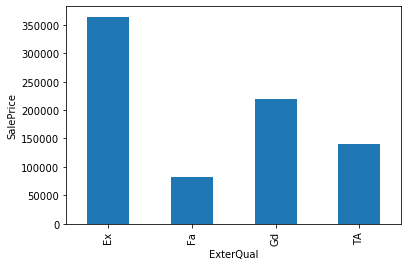

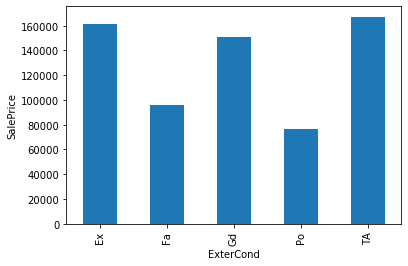

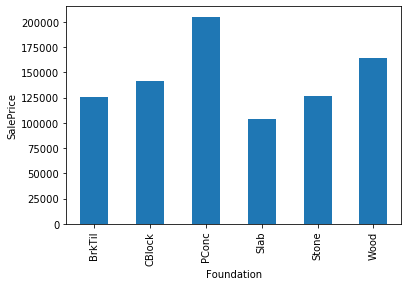

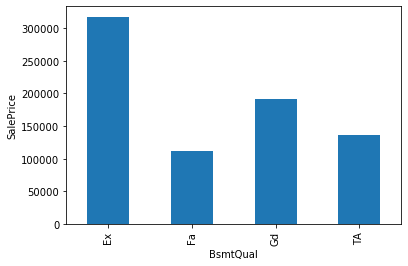

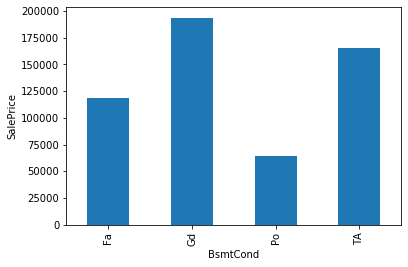

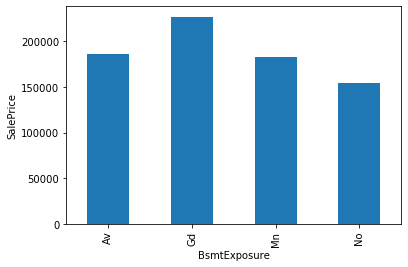

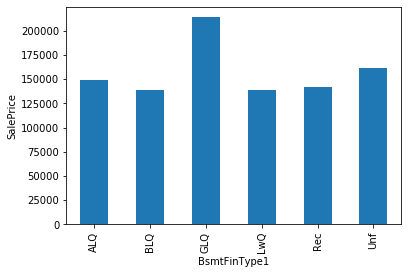

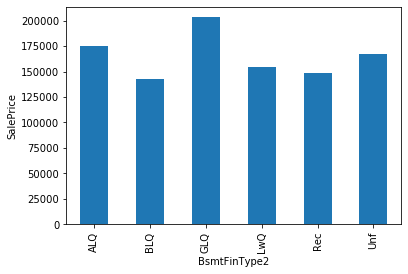

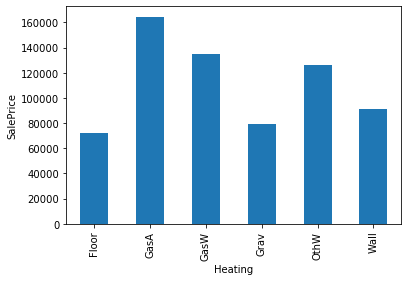

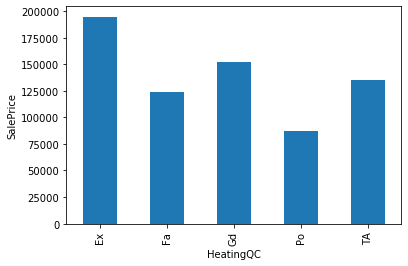

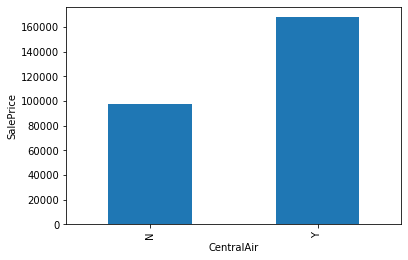

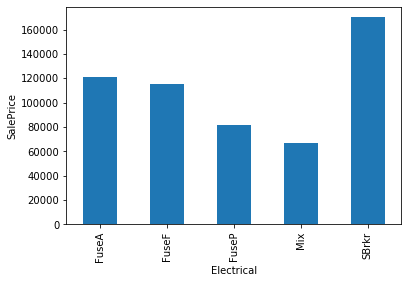

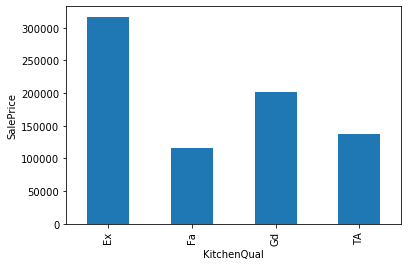

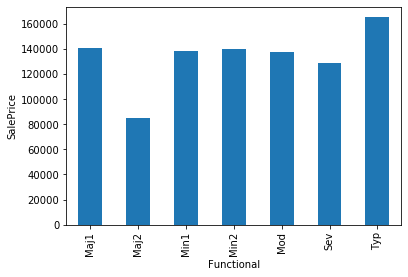

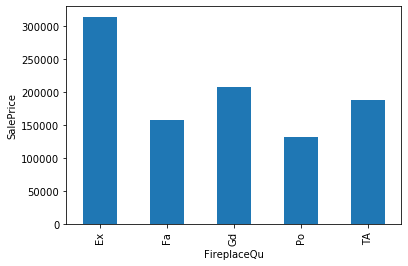

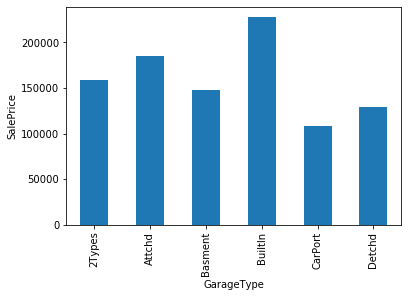

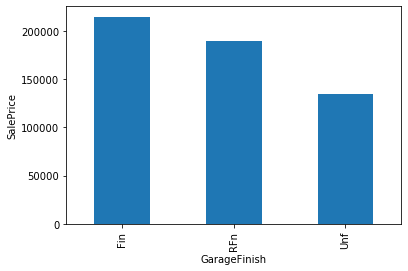

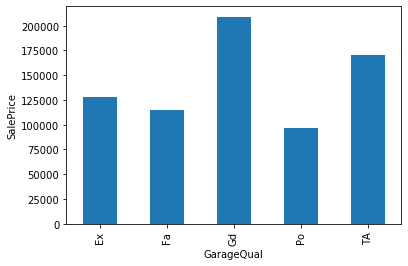

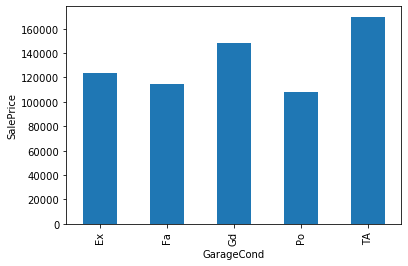

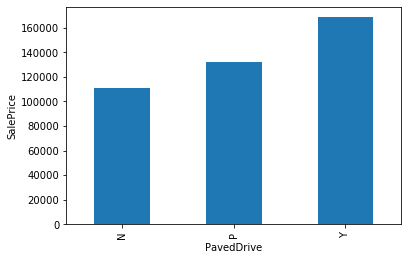

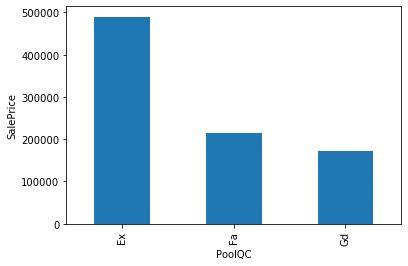

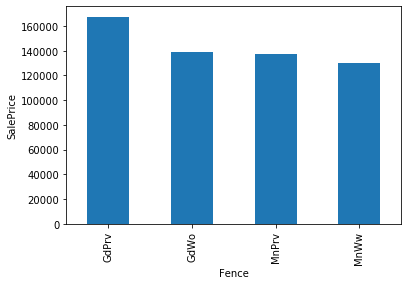

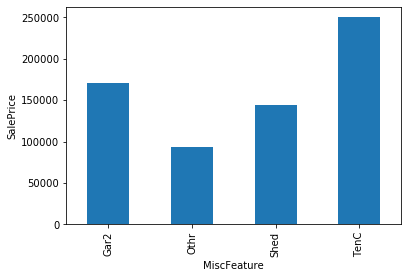

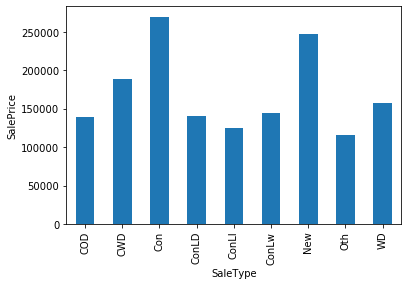

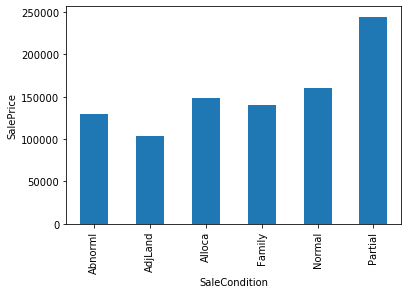

In [81]:
# find relation betwwn categorical feature and salesprice
data = dataset.copy()
for feature in categorical_feature:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()